In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv"
df = pd.read_csv(url)

In [5]:
print(df.head())

     Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB
None


In [9]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [11]:
import numpy as np

df_cat = df.select_dtypes(exclude=[np.number])
df_num = df.select_dtypes(include=[np.number])

In [13]:
print("Categorical Columns:\n", df_cat.columns)
print("Numerical Columns:\n", df_num.columns)

Categorical Columns:
 Index(['Make', 'Colour'], dtype='object')
Numerical Columns:
 Index(['Odometer (KM)', 'Doors', 'Price'], dtype='object')


In [15]:
for col in df_cat.columns:
    print(f"{col} : {df_cat[col].unique()}")

Make : ['Honda' 'BMW' 'Toyota' 'Nissan' nan]
Colour : ['White' 'Blue' 'Red' 'Green' nan 'Black']


In [17]:
for col in df_cat.columns:
    print(f"\n{col} value counts:")
    print(df_cat[col].value_counts(dropna=False))


Make value counts:
Make
Toyota    379
Honda     292
Nissan    183
BMW        97
NaN        49
Name: count, dtype: int64

Colour value counts:
Colour
White    390
Blue     302
Black     95
Red       88
Green     75
NaN       50
Name: count, dtype: int64


In [19]:
for col in df_cat.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df_num.columns:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipykernel_12971/4219121791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_12971/4219121791.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [21]:
for col in df_cat.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
for col in df_num.columns:
    df[col] = df[col].fillna(df[col].median())

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_cat.columns:
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())

   Make  Colour  Odometer (KM)  Doors    Price
0     1       4        35431.0    4.0  15323.0
1     0       1       192714.0    5.0  19943.0
2     1       4        84714.0    4.0  28343.0
3     3       4       154365.0    4.0  13434.0
4     2       1       181577.0    3.0  14043.0


In [27]:
df_ohe = pd.get_dummies(df, drop_first=True)
print(df_ohe.head())

   Make  Colour  Odometer (KM)  Doors    Price
0     1       4        35431.0    4.0  15323.0
1     0       1       192714.0    5.0  19943.0
2     1       4        84714.0    4.0  28343.0
3     3       4       154365.0    4.0  13434.0
4     2       1       181577.0    3.0  14043.0


In [31]:
df['Price'] = df['Price'].replace('[\\$,]', '', regex=True).astype(float)
print(df['Price'].head())

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64


In [33]:
df['Odometer_Group'] = pd.cut(df['Odometer (KM)'], bins=[0,50000,150000,300000], labels=['Low','Mid','High'])
print(df[['Odometer (KM)','Odometer_Group']].head())

   Odometer (KM) Odometer_Group
0        35431.0            Low
1       192714.0           High
2        84714.0            Mid
3       154365.0           High
4       181577.0           High


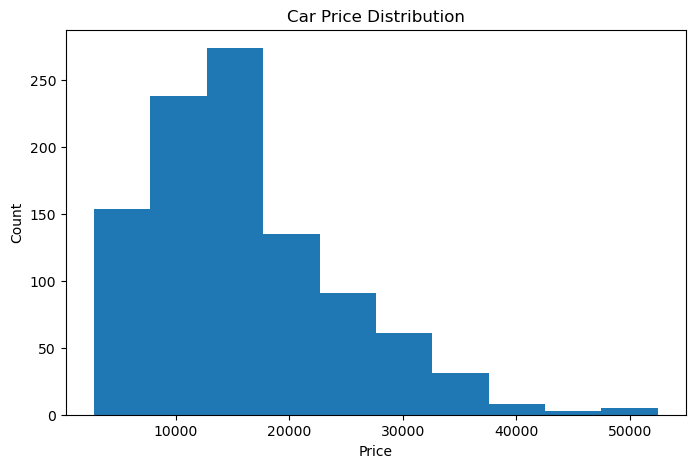

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=10)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()